In [102]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
import nltk

nltk.download('punkt')

datasets = ['ayam', 'ikan', 'kambing', 'sapi', 'telur', 'tahu', 'tempe', 'udang']
dfs = [pd.read_csv(f'./indo-food/dataset-{food}.csv') for food in datasets]
recipes = pd.concat(dfs)

recipes.dropna(inplace=True)
recipes.info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erle_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
Index: 15592 entries, 0 to 1993
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15592 non-null  object
 1   Ingredients  15592 non-null  object
dtypes: object(2)
memory usage: 365.4+ KB


In [103]:
# Function to tokenize and clean text
def process_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return tokens

recipes['ingredients_clean'] = recipes['Ingredients'].apply(process_text)
all_ingredients = [ingredient for sublist in recipes['ingredients_clean'].tolist() for ingredient in sublist]

punctuation = list(string.punctuation)
filtered_ingredients = [ingredient for ingredient in all_ingredients if ingredient not in punctuation]

In [104]:
# Calculate word frequencies
freq_dist = FreqDist(filtered_ingredients)

n_most_common = 100 
most_common_words = freq_dist.most_common(n_most_common)

In [105]:
most_common_words

[('bawang', 31415),
 ('secukupnya', 22671),
 ('merah', 18517),
 ('buah', 17689),
 ('siung', 16903),
 ('putih', 16277),
 ('garam', 13772),
 ('daun', 11840),
 ('cabe', 10711),
 ('gula', 8704),
 ('iris', 7016),
 ('butir', 6667),
 ('air', 6630),
 ('potong', 6489),
 ('bubuk', 6287),
 ('minyak', 6270),
 ('rawit', 6040),
 ('kecap', 5684),
 ('goreng', 5203),
 ('ayam', 4927),
 ('ruas', 4868),
 ('tomat', 4826),
 ('jeruk', 4594),
 ('lembar', 4519),
 ('tepung', 4304),
 ('telur', 4283),
 ('manis', 4165),
 ('merica', 3886),
 ('batang', 3859),
 ('jahe', 3858),
 ('selera', 3701),
 ('salam', 3629),
 ('lada', 3606),
 ('daging', 3588),
 ('dan', 3316),
 ('penyedap', 3253),
 ('sesuai', 3244),
 ('kunyit', 3119),
 ('besar', 3104),
 ('kecil', 3093),
 ('tahu', 3061),
 ('untuk', 3018),
 ('cabai', 2997),
 ('kemiri', 2970),
 ('bumbu', 2940),
 ('sapi', 2879),
 ('halus', 2849),
 ('ketumbar', 2821),
 ('geprek', 2667),
 ('lengkuas', 2639),
 ('tempe', 2525),
 ('udang', 2476),
 ('bombay', 2412),
 ('kaldu', 2409),
 ('ti

In [ ]:
most_common_spices = translated_list = [
    ('onion', 'bawang', 31415),
    ('to taste', 'secukupnya', 22671),
    ('red', 'merah', 18517),
    ('fruit', 'buah', 17689),
    ('clove', 'siung', 16903),
    ('white', 'putih', 16277),
    ('salt', 'garam', 13772),
    ('leaf', 'daun', 11840),
    ('chili', 'cabe', 10711),
    ('sugar', 'gula', 8704),
    ('slice', 'iris', 7016),
    ('grain', 'butir', 6667),
    ('water', 'air', 6630),
    ('cut', 'potong', 6489),
    ('powder', 'bubuk', 6287),
    ('oil', 'minyak', 6270),
    ('chili pepper', 'rawit', 6040),
    ('soy sauce', 'kecap', 5684),
    ('fried', 'goreng', 5203),
    ('chicken', 'ayam', 4927),
    ('segment', 'ruas', 4868),
    ('tomato', 'tomat', 4826),
    ('orange', 'jeruk', 4594),
    ('sheet', 'lembar', 4519),
    ('flour', 'tepung', 4304),
    ('egg', 'telur', 4283),
    ('sweet', 'manis', 4165),
    ('pepper', 'merica', 3886),
    ('stalk', 'batang', 3859),
    ('ginger', 'jahe', 3858),
    ('taste', 'selera', 3701),
    ('bay leaf', 'salam', 3629),
    ('pepper', 'lada', 3606),
    ('meat', 'daging', 3588),
    ('and', 'dan', 3316),
    ('seasoning', 'penyedap', 3253),
    ('according', 'sesuai', 3244),
    ('turmeric', 'kunyit', 3119),
    ('big', 'besar', 3104),
    ('small', 'kecil', 3093),
    ('tofu', 'tahu', 3061),
    ('for', 'untuk', 3018),
    ('chili', 'cabai', 2997),
    ('candlenut', 'kemiri', 2970),
    ('spice', 'bumbu', 2940),
    ('beef', 'sapi', 2879),
    ('smooth', 'halus', 2849),
    ('coriander', 'ketumbar', 2821),
    ('crushed', 'geprek', 2667),
    ('galangal', 'lengkuas', 2639),
    ('tempeh', 'tempe', 2525),
    ('shrimp', 'udang', 2476),
    ('onion', 'bombay', 2412),
    ('broth', 'kaldu', 2409),
    ('thin', 'tipis', 2335),
    ('sauce', 'saus', 2327),
    ('taste', 'rasa', 2250),
    ('seed', 'biji', 2198),
    ('oyster sauce', 'tiram', 2012),
    ('gram', 'gram', 1973),
    ('spoon', 'sendok', 1911),
    ('goat', 'kambing', 1875),
    ('sand', 'pasir', 1866),
    ('carrot', 'wortel', 1854),
    ('fish', 'ikan', 1833),
    ('sauce', 'saos', 1788),
    ('a little', 'sedikit', 1740),
    ('chopped', 'cincang', 1733),
    ('coconut milk', 'santan', 1694),
    ('in', 'di', 1677),
    ('stir-fry', 'menumis', 1676),
    ('size', 'ukuran', 1664),
    ('flour', 'terigu', 1631),
    ('green', 'hijau', 1625),
    ('curly', 'keriting', 1574),
    ('pack', 'bungkus', 1566),
    ('board', 'papan', 1566),
    ('lemongrass', 'serai', 1456),
    ('lemongrass', 'sereh', 1409),
    ('finger', 'jari', 1397),
    ('I', 'saya', 1376),
    ('medium', 'sedang', 1350),
    ('thin', 'nipis', 1281),
    ('tail', 'ekor', 1270),
    ('which', 'yg', 1150),
    ('dice', 'dadu', 1145),
    ('Java', 'jawa', 1065),
    ('use', 'pakai', 1060),
    ('boil', 'rebus', 1043),
    ('can', 'bisa', 1020),
    ('seed', 'btr', 1016),
    ('potato', 'kentang', 990),
    ('royco', 'royco', 988),
    ('box', 'kotak', 968),
    ('salty', 'asin', 927),
    ('smooth', 'haluskan', 916),
    ('or', 'atau', 893),
    ('tamarind', 'asam', 880),
    ('peel', 'kupas', 879),
    ('celery', 'seledri', 878)
]

In [106]:
duplicate_recipes = recipes[recipes.duplicated(subset=['Title'])]
duplicate_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 18 to 1989
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              3299 non-null   object
 1   Ingredients        3299 non-null   object
 2   ingredients_clean  3299 non-null   object
dtypes: object(3)
memory usage: 103.1+ KB


In [107]:
unique_recipes = recipes.drop_duplicates(subset=['Title'])
unique_recipes = unique_recipes.reset_index()
unique_recipes.info()
unique_recipes['Title'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12293 entries, 0 to 12292
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              12293 non-null  int64 
 1   Title              12293 non-null  object
 2   Ingredients        12293 non-null  object
 3   ingredients_clean  12293 non-null  object
dtypes: int64(1), object(3)
memory usage: 384.3+ KB


12293

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(unique_recipes['Title'])

# Apply t-SNE to reduce the dimensionality
tsne = TSNE(n_components=2, random_state=42, init='random')
tsne_result = tsne.fit_transform(tfidf_matrix)

In [109]:
tsne_recipes = pd.DataFrame(tsne_result, columns=['tsne_1', 'tsne_2'])
tsne_recipes.info()
unique_recipes['Title'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12293 entries, 0 to 12292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tsne_1  12293 non-null  float32
 1   tsne_2  12293 non-null  float32
dtypes: float32(2)
memory usage: 96.2 KB


12293

In [110]:
tsne_recipes['recipe'] = unique_recipes['Title']
tsne_recipes.head(10)

,tsne_1,tsne_2,recipe
0,55.875675,54.729427,Ayam Woku Manado
1,68.843338,27.182886,Ayam goreng tulang lunak
2,-46.515366,68.314865,Ayam cabai kawin
3,3.495285,30.090998,Ayam Geprek
4,-34.620686,-11.472843,Minyak Ayam
5,36.583061,24.744461,Nasi Bakar Ayam
6,-47.021297,12.823585,Ayam Saus Hintalu Jaruk
7,-76.268250,-38.532776,Ayam saos teriyaki Lada Hitam
8,-39.769096,-47.139984,Steak ayam
9,-4.011288,59.975952,Ayam Saos Asam Manis Simple


In [111]:
from sklearn.cluster import KMeans

n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tsne_recipes['cluster'] = kmeans.fit_predict(tsne_recipes[['tsne_1', 'tsne_2']])

# Find cluster centers
cluster_centers = kmeans.cluster_centers_

C:\Users\Erle_\MyCode\my-code\data-echoes\.data-echoes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [112]:
import numpy as np

# Get distances to each cluster center for each data point
distances_per_cluster = kmeans.transform(tsne_recipes[['tsne_1', 'tsne_2']])

# Get the smallest distance each data point
distances = np.min(distances_per_cluster, axis=1)

tsne_recipes['distance'] = distances
center_recipes = tsne_recipes[['cluster', 'recipe', 'distance']].groupby('cluster').min()


C:\Users\Erle_\MyCode\my-code\data-echoes\.data-echoes\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127844 (\N{FRIED SHRIMP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


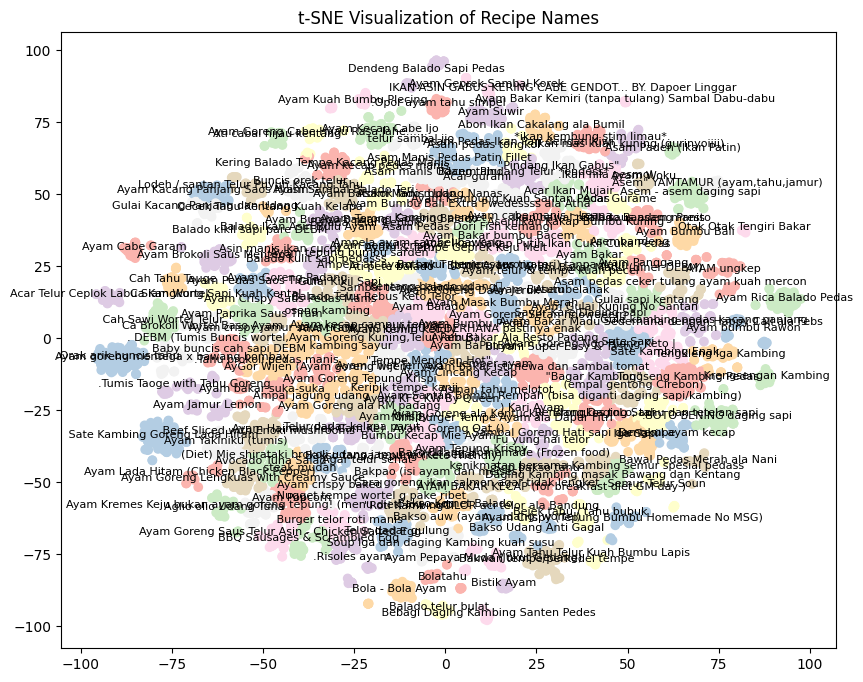

In [113]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_recipes['tsne_1'], tsne_recipes['tsne_2'], c=tsne_recipes['cluster'], cmap='Pastel1')

# Annotate cluster centers
for center, label in zip(cluster_centers, center_recipes['recipe']):
    plt.annotate(label, (center[0], center[1]), textcoords="offset points", xytext=(0, 0), ha='center', size=8)

plt.title('t-SNE Visualization of Recipe Names')
plt.show()